In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON/제주 특산물 가격예측/open (3)/open/train.csv')

# Display the first few rows of the dataframe
data.head()


,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0


<ipython-input-2-6c1415df36ad>:22: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


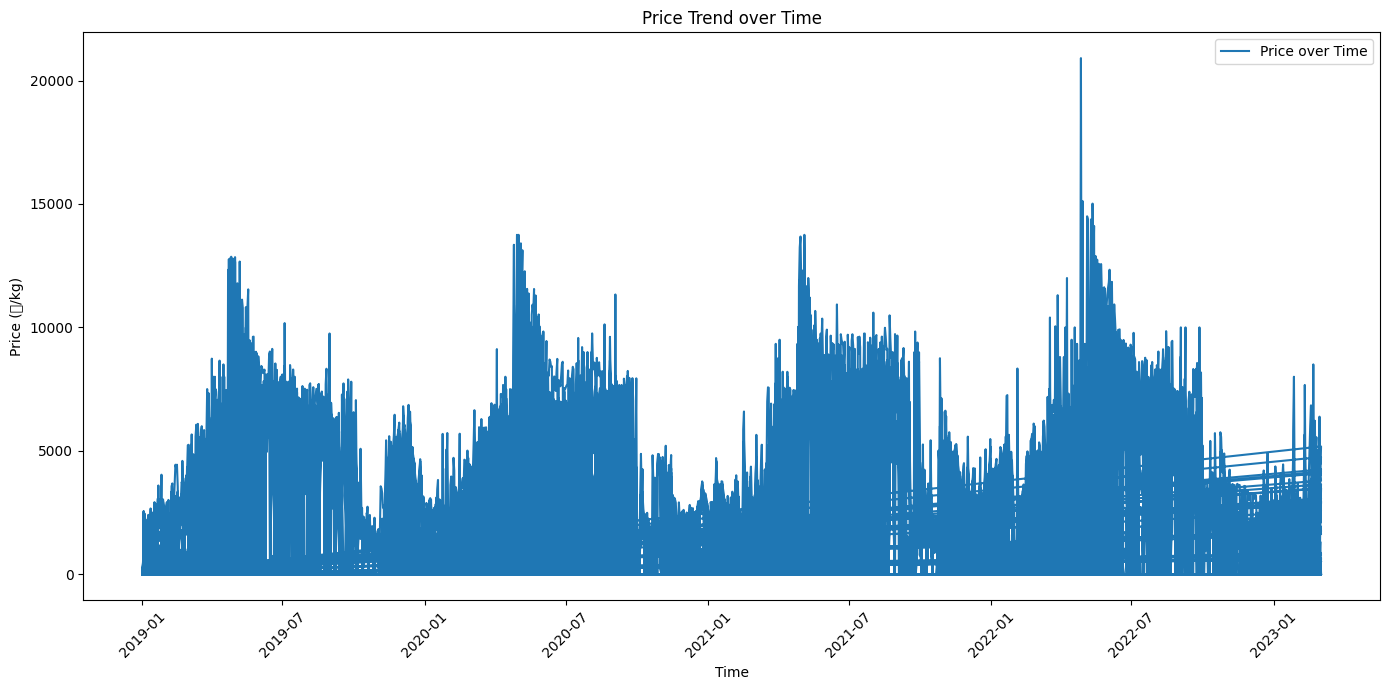

In [2]:
import matplotlib.pyplot as plt

# Convert 'timestamp' to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Plotting the price over time
plt.figure(figsize=(14,7))
plt.plot(data['timestamp'], data['price(원/kg)'], label='Price over Time')

# Adding title and labels
plt.title('Price Trend over Time')
plt.xlabel('Time')
plt.ylabel('Price (원/kg)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()


<ipython-input-3-0ae26a6305ca>:20: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


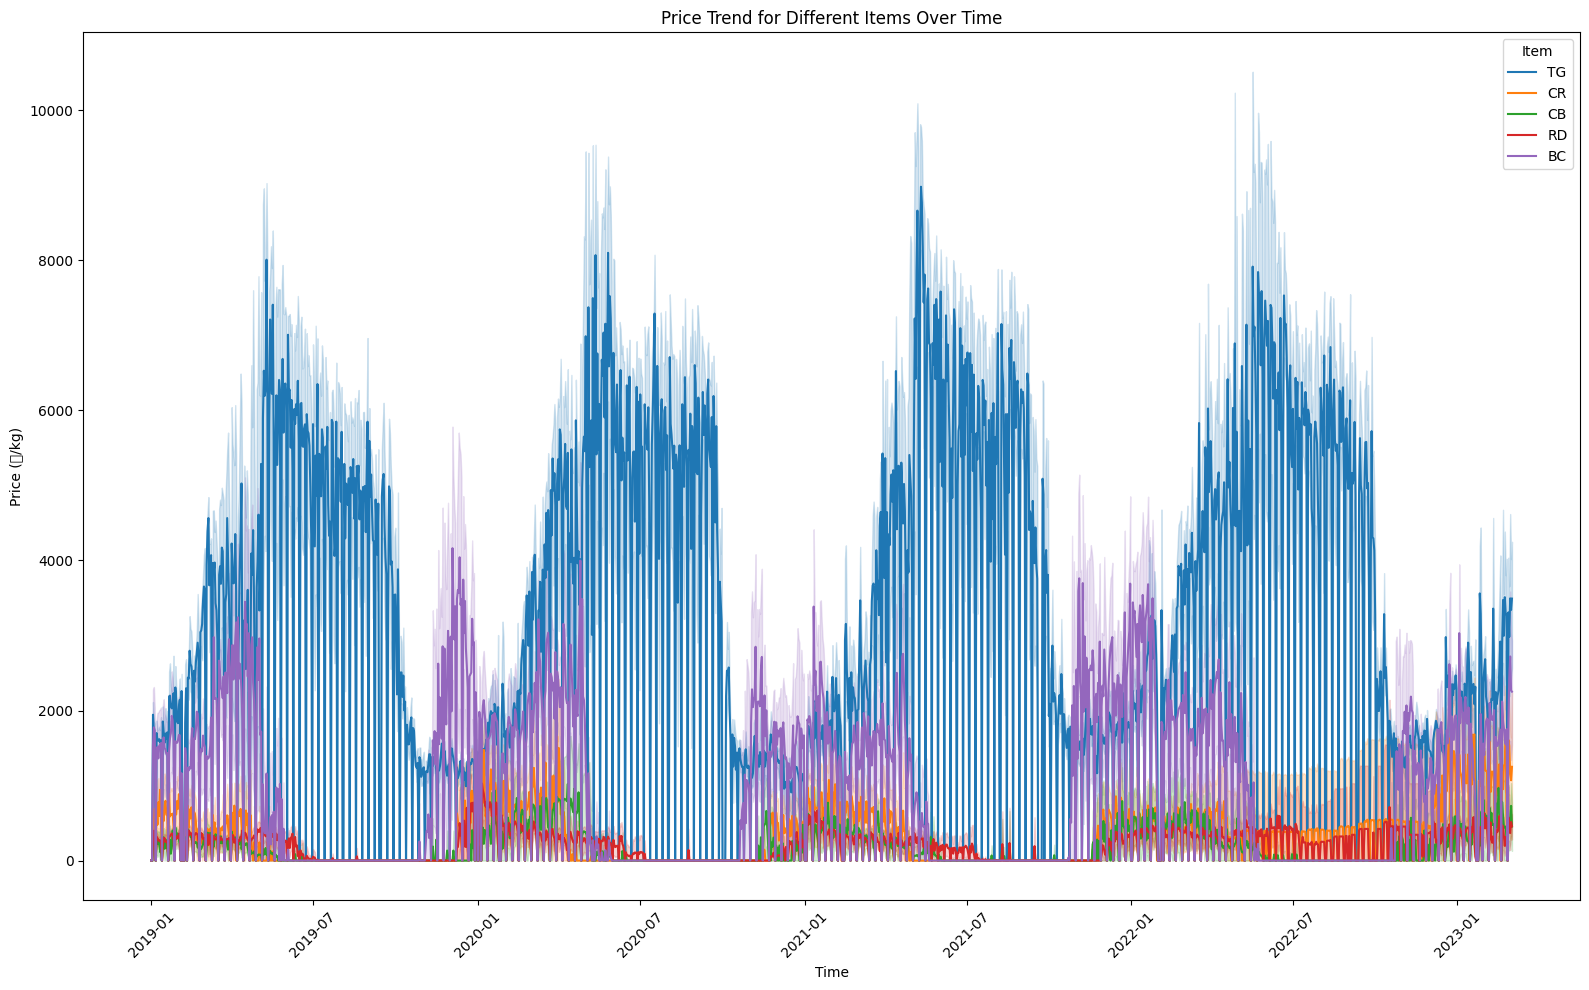

In [3]:
import seaborn as sns

# Filtering the data for visualization of 'item' and 'price(원/kg)' trend
item_price_data = data[['timestamp', 'item', 'price(원/kg)']].copy()

# Remove entries with price 0 to avoid skewing the plot
#item_price_data = item_price_data[item_price_data['price(원/kg)'] > 0]

# Plotting price trends for different items
plt.figure(figsize=(16, 10))
sns.lineplot(x='timestamp', y='price(원/kg)', hue='item', data=item_price_data)

plt.title('Price Trend for Different Items Over Time')
plt.xlabel('Time')
plt.ylabel('Price (원/kg)')
plt.xticks(rotation=45)
plt.legend(title='Item')

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-4-645f975200fa>:17: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()


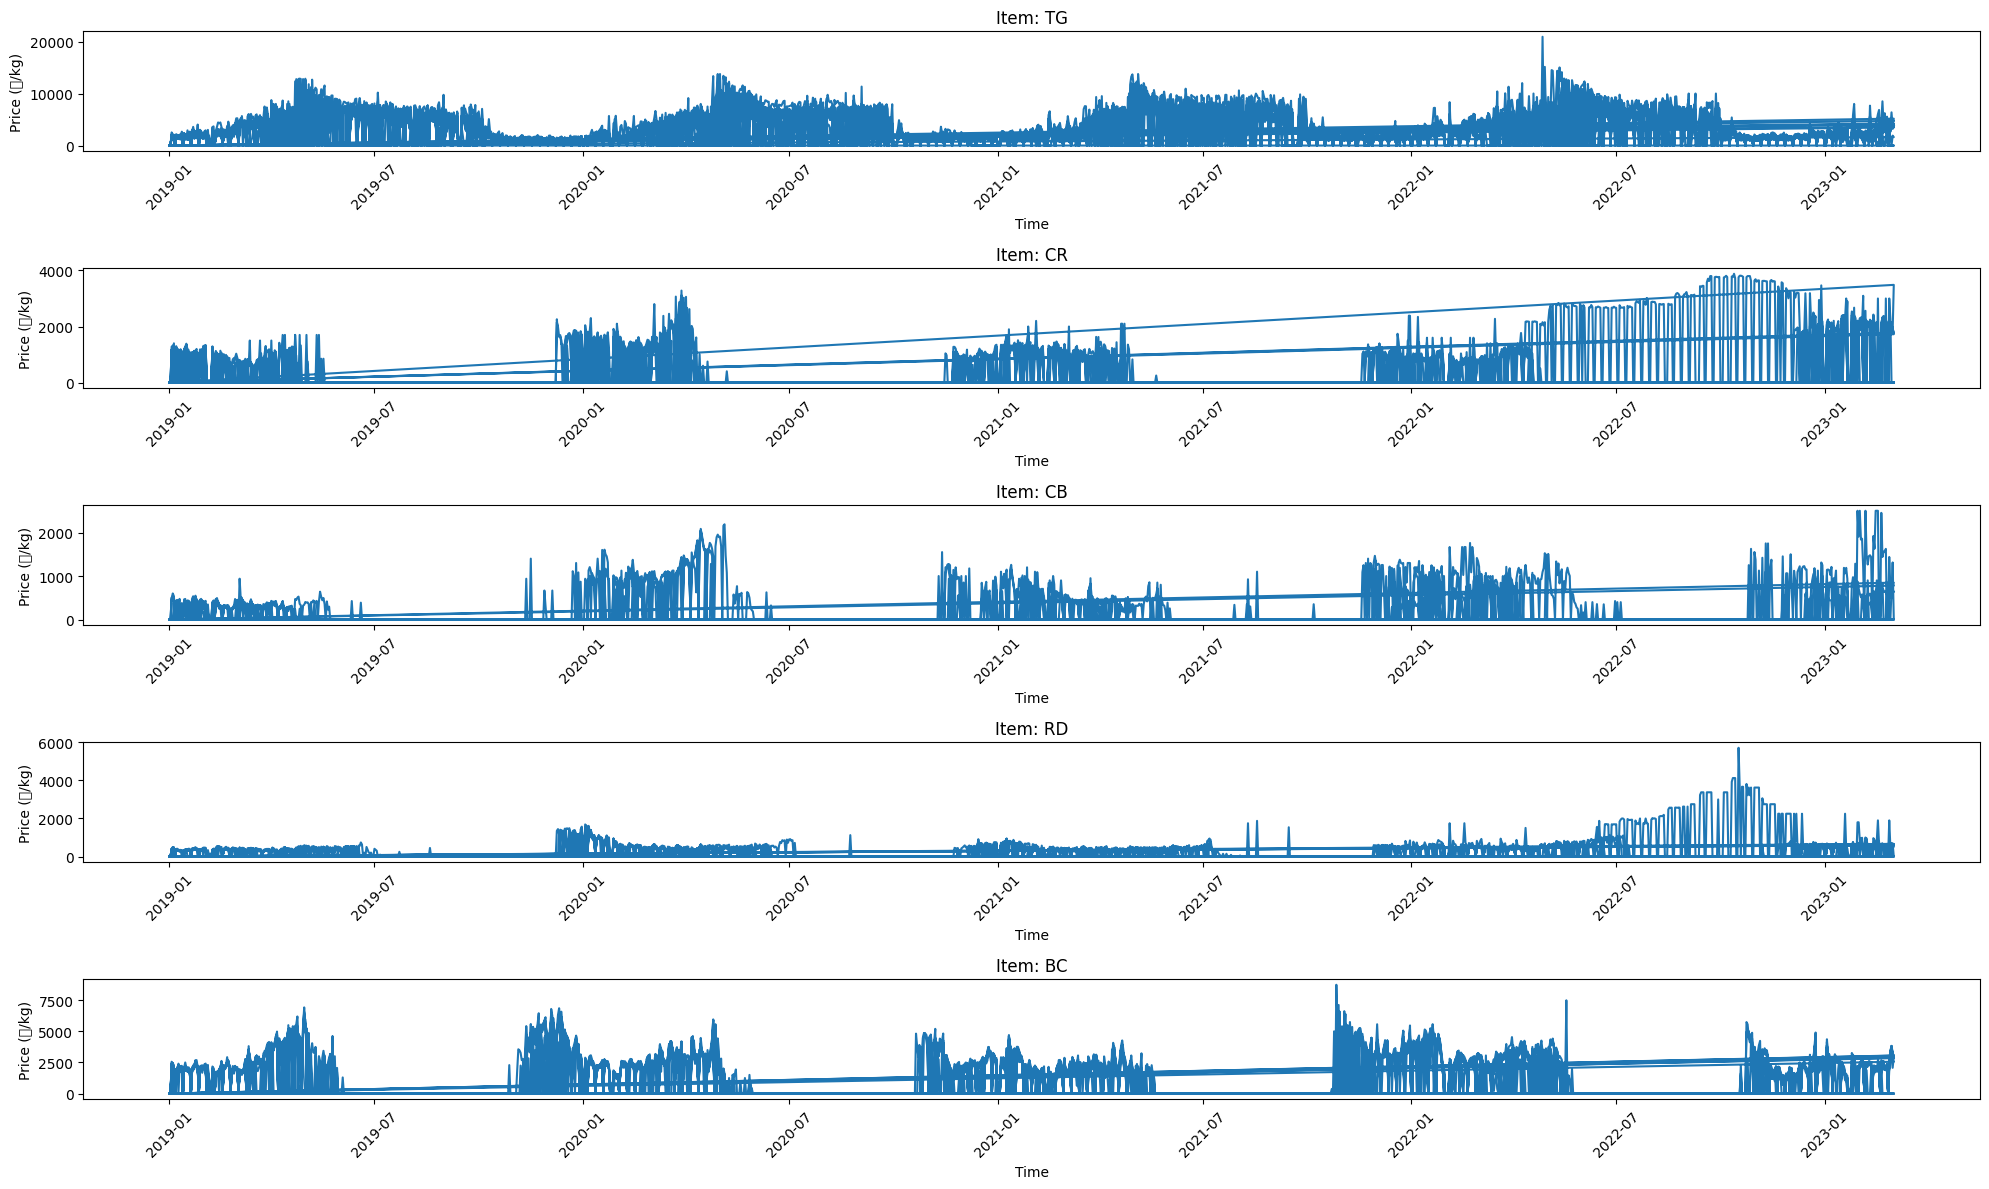

In [4]:
# Setting the plotting area to accommodate all item plots
plt.figure(figsize=(20, 12))

# Number of items
num_items = item_price_data['item'].nunique()

# Creating subplots for each item
for i, item in enumerate(item_price_data['item'].unique(), 1):
    plt.subplot(num_items, 1, i)
    item_data = item_price_data[item_price_data['item'] == item]
    plt.plot(item_data['timestamp'], item_data['price(원/kg)'])
    plt.title(f'Item: {item}')
    plt.xlabel('Time')
    plt.ylabel('Price (원/kg)')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Function to perform ADF test
def perform_adf_test(series):
    result = adfuller(series, autolag='AIC')
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]
    return p_value, adf_statistic, critical_values

# Applying the ADF test to each item and collect the results
adf_test_results = {}
for item in item_price_data['item'].unique():
    series = item_price_data[item_price_data['item'] == item]['price(원/kg)']
    p_value, adf_statistic, critical_values = perform_adf_test(series)
    adf_test_results[item] = {'p_value': p_value, 'adf_statistic': adf_statistic, 'critical_values': critical_values}

adf_test_results

# 모든 item 데이터가 정상적이다.

{'TG': {'p_value': 2.470655323643789e-18,
  'adf_statistic': -10.355655133443147,
  'critical_values': {'1%': -3.430911967764111,
   '5%': -2.8617883601746312,
   '10%': -2.5669021970395876}},
 'CR': {'p_value': 0.0012867379393737258,
  'adf_statistic': -4.024662246504158,
  'critical_values': {'1%': -3.433508425435403,
   '5%': -2.86293524928508,
   '10%': -2.5675127665417286}},
 'CB': {'p_value': 6.072993060391811e-06,
  'adf_statistic': -5.278258013036351,
  'critical_values': {'1%': -3.4344131164513874,
   '5%': -2.8633346290071326,
   '10%': -2.5677254234217317}},
 'RD': {'p_value': 9.904632415643878e-07,
  'adf_statistic': -5.65012154757424,
  'critical_values': {'1%': -3.431982608051027,
   '5%': -2.8622613969260846,
   '10%': -2.5671540071976806}},
 'BC': {'p_value': 2.714528742807921e-16,
  'adf_statistic': -9.54177770438578,
  'critical_values': {'1%': -3.431803038342095,
   '5%': -2.862182070228003,
   '10%': -2.5671117774386745}}}

<ipython-input-6-ca0bdf95505d>:26: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


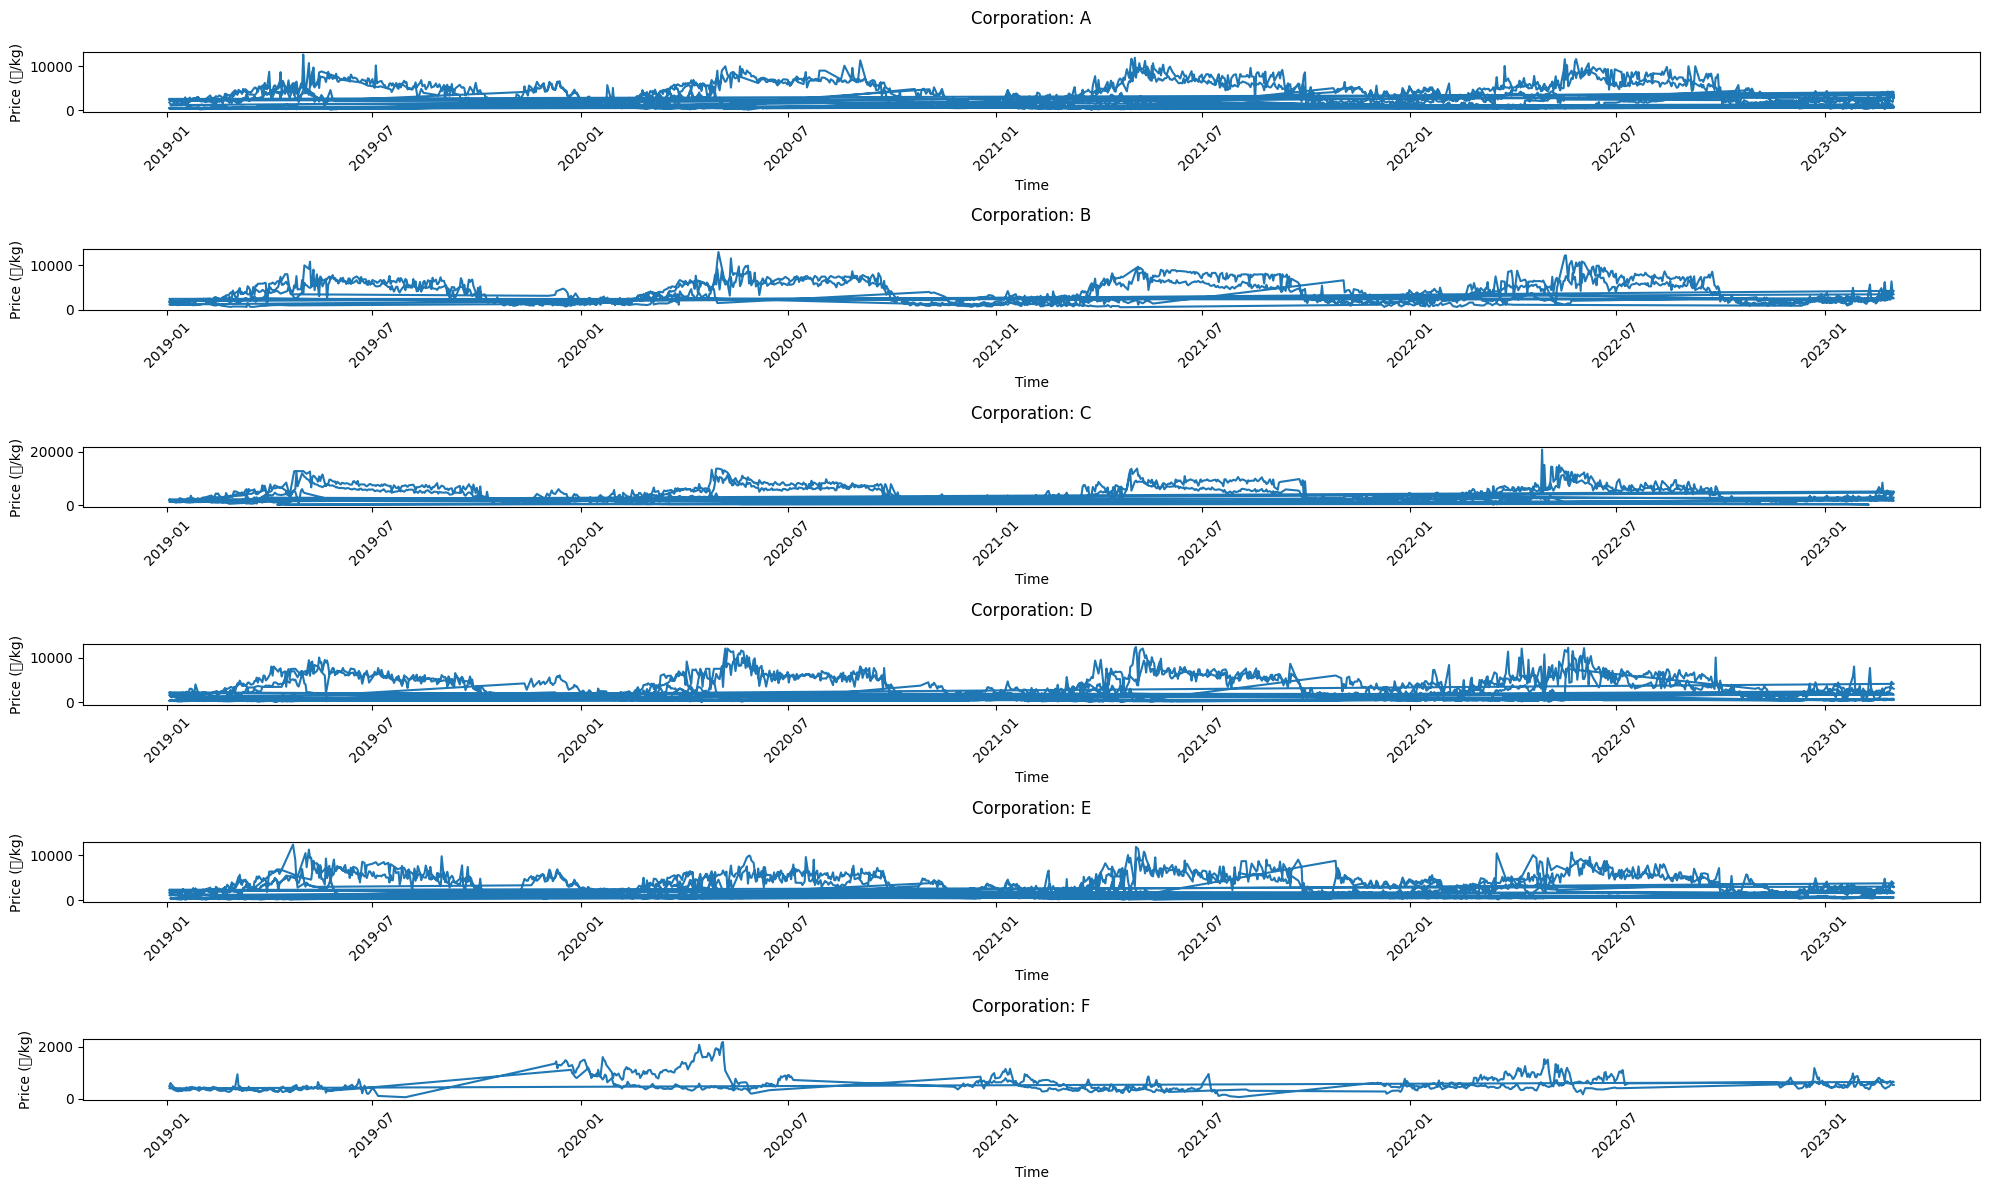

In [ ]:
# We will include the 'corporation' column in the data we want to visualize
corporation_price_data = data[['timestamp', 'corporation', 'price(원/kg)']].copy()

# Remove entries with price 0 to avoid skewing the plot
corporation_price_data = corporation_price_data[corporation_price_data['price(원/kg)'] > 0]

# Setting the plotting area to accommodate all corporation plots
plt.figure(figsize=(20, 12))

# Get unique corporations
corporations = corporation_price_data['corporation'].unique()

# Number of corporations
num_corporations = len(corporations)

# Creating subplots for each corporation
for i, corporation in enumerate(corporations, 1):
    plt.subplot(num_corporations, 1, i)
    corporation_data = corporation_price_data[corporation_price_data['corporation'] == corporation]
    plt.plot(corporation_data['timestamp'], corporation_data['price(원/kg)'])
    plt.title(f'Corporation: {corporation}', pad=20)
    plt.xlabel('Time')
    plt.ylabel('Price (원/kg)')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# Perform ADF test for each corporation and collect the results
adf_test_results_corporations = {}
for corporation in corporations:
    series = corporation_price_data[corporation_price_data['corporation'] == corporation]['price(원/kg)']
    p_value, adf_statistic, critical_values = perform_adf_test(series)
    adf_test_results_corporations[corporation] = {
        'p_value': p_value,
        'adf_statistic': adf_statistic,
        'critical_values': critical_values
    }

adf_test_results_corporations

# 테스트 결과 p_value 값이 작은 걸로 보아 각각의 데이터가 정상적이라는걸 알 수 있다.

{'A': {'p_value': 2.464549537872586e-05,
  'adf_statistic': -4.976957177916445,
  'critical_values': {'1%': -3.4314818696418485,
   '5%': -2.8620401788450613,
   '10%': -2.5670362432502007}},
 'B': {'p_value': 0.0010535752741445852,
  'adf_statistic': -4.077824762800961,
  'critical_values': {'1%': -3.4323875260668344,
   '5%': -2.862440255934873,
   '10%': -2.5672492261933377}},
 'C': {'p_value': 0.001871051568717263,
  'adf_statistic': -3.923132090706509,
  'critical_values': {'1%': -3.432283885147278,
   '5%': -2.8623944783328996,
   '10%': -2.5672248552253967}},
 'D': {'p_value': 0.00025316123463480747,
  'adf_statistic': -4.43889310663592,
  'critical_values': {'1%': -3.4316879828306157,
   '5%': -2.862131240802278,
   '10%': -2.567084718698901}},
 'E': {'p_value': 7.688975251028045e-06,
  'adf_statistic': -5.228459124325816,
  'critical_values': {'1%': -3.4316142602198183,
   '5%': -2.8620986704655773,
   '10%': -2.567067380251581}},
 'F': {'p_value': 0.0028712938797211536,
  'ad

<ipython-input-8-274dcb4ea108>:26: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


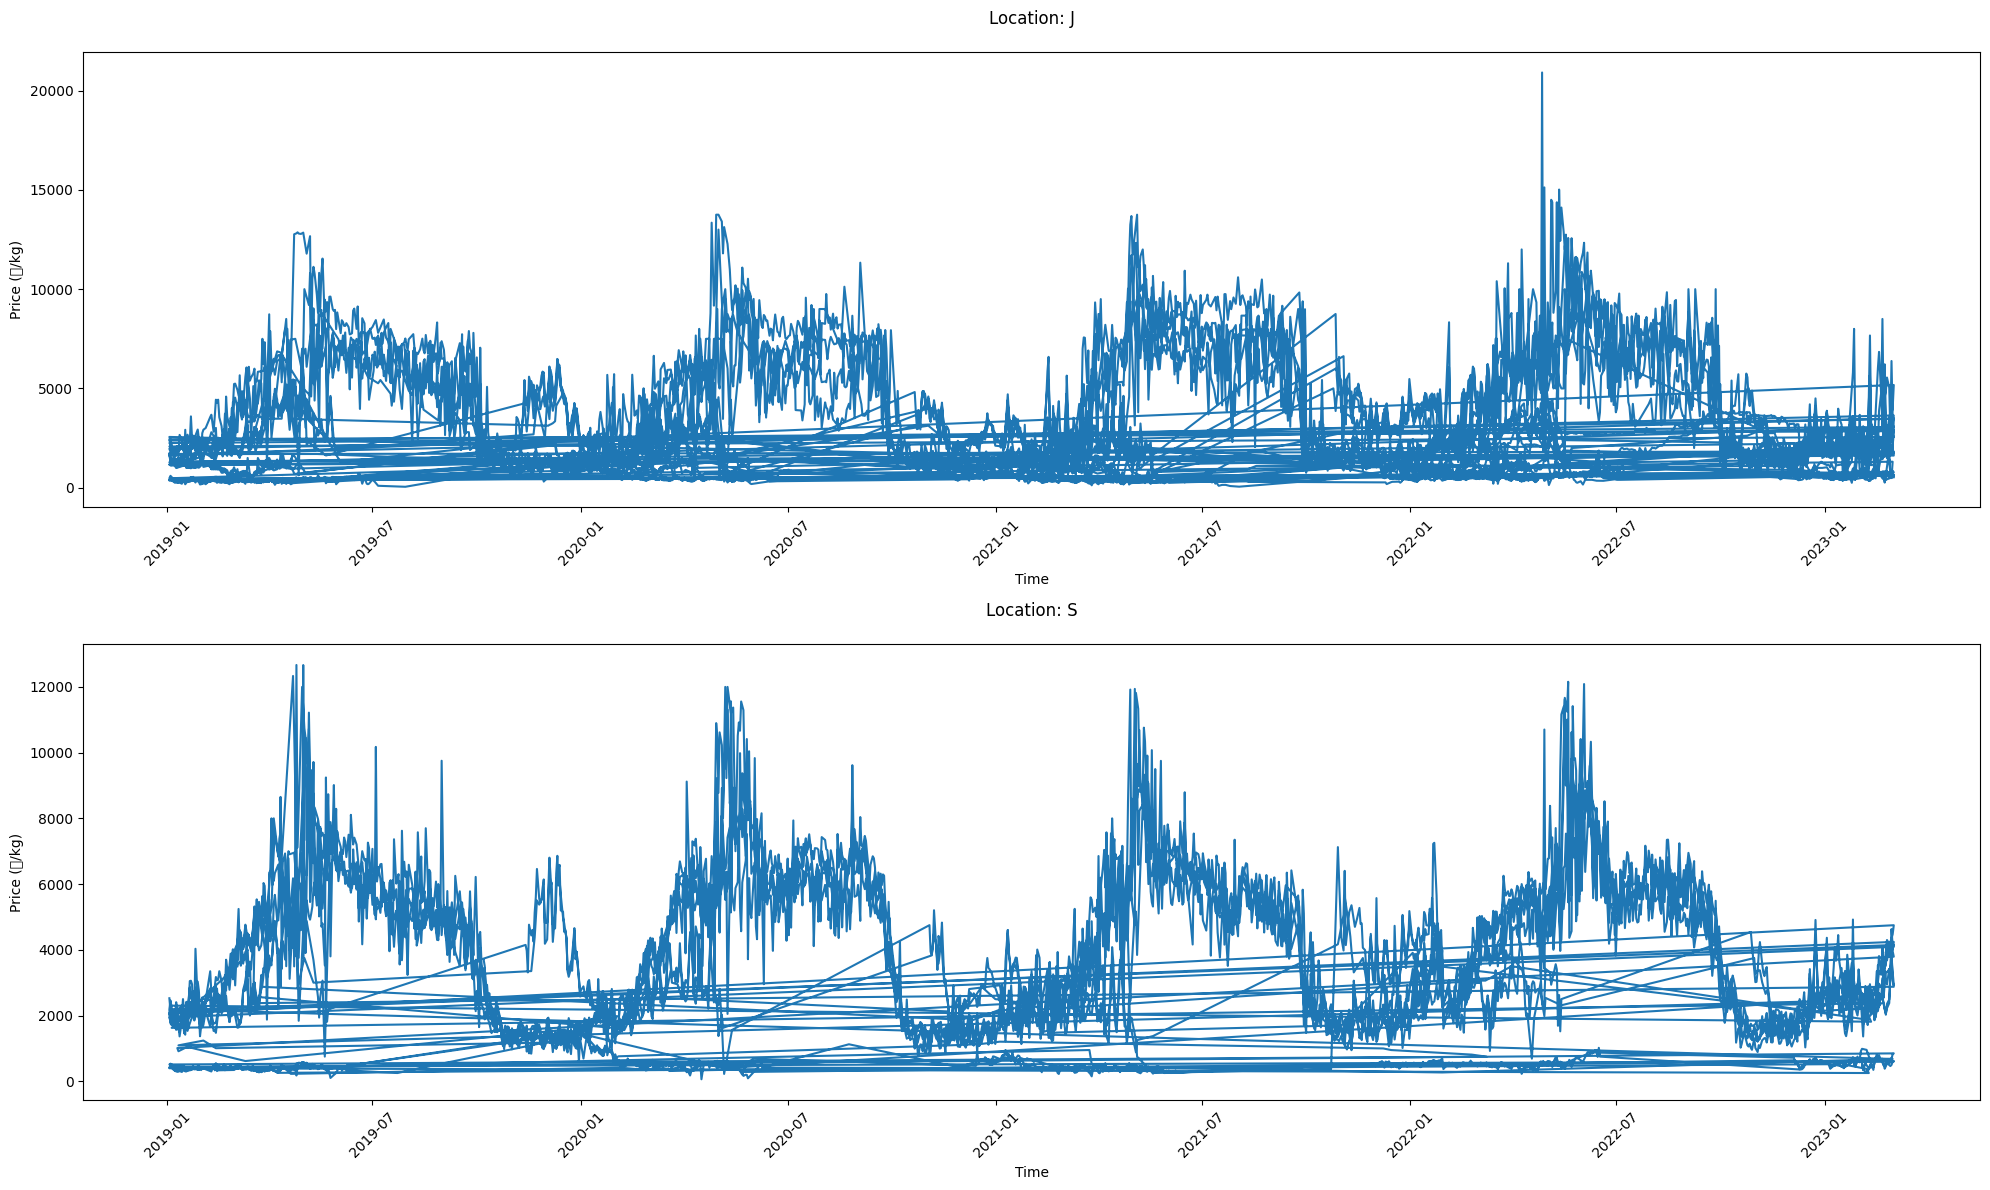

In [ ]:
# We will include the 'corporation' column in the data we want to visualize
location_price_data = data[['timestamp', 'location', 'price(원/kg)']].copy()

# Remove entries with price 0 to avoid skewing the plot
location_price_data = location_price_data[location_price_data['price(원/kg)'] > 0]

# Setting the plotting area to accommodate all location plots
plt.figure(figsize=(20, 12))

# Get unique locations
locations = location_price_data['location'].unique()

# Number of locations
num_locations = len(locations)

# Creating subplots for each corporation
for i, location in enumerate(locations, 1):
    plt.subplot(num_locations, 1, i)
    location_data = location_price_data[location_price_data['location'] == location]
    plt.plot(location_data['timestamp'], location_data['price(원/kg)'])
    plt.title(f'Location: {location}', pad=20)
    plt.xlabel('Time')
    plt.ylabel('Price (원/kg)')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# Perform ADF test for each corporation and collect the results
adf_test_results_locations = {}
for location in locations:
    series = location_price_data[location_price_data['location'] == location]['price(원/kg)']
    p_value, adf_statistic, critical_values = perform_adf_test(series)
    adf_test_results_locations[location] = {
        'p_value': p_value,
        'adf_statistic': adf_statistic,
        'critical_values': critical_values
    }

adf_test_results_locations

# 테스트 결과 p_value 값이 작은 걸로 보아 각각의 데이터가 정상적이라는걸 알 수 있다.

{'J': {'p_value': 7.168020876825086e-13,
  'adf_statistic': -8.20249905514099,
  'critical_values': {'1%': -3.4307890727200374,
   '5%': -2.861734051048458,
   '10%': -2.56687328870664}},
 'S': {'p_value': 2.844918139442723e-09,
  'adf_statistic': -6.75763724294873,
  'critical_values': {'1%': -3.4310786588922135,
   '5%': -2.8618620198447844,
   '10%': -2.566941406139108}}}

# international trade 데이터프레임 분석

In [ ]:
trade_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON/제주 특산물 가격예측/open (3)/open/international_trade.csv')

In [ ]:
trade_data

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2019-01,토마토(신선한 것이나 냉장한 것으로 한정한다),356571,990,0,0,990
1,2019-01,양파,821330,222,4003206,1118,-896
2,2019-01,쪽파,60,1,93405,128,-127
3,2019-01,꽃양배추와 브로콜리(broccoli),160,1,638913,563,-562
4,2019-01,방울다다기 양배추,0,0,7580,38,-38
...,...,...,...,...,...,...,...
1269,2023-02,포포(papaw)[파파야(papaya)],0,0,23830,71,-71
1270,2023-02,사과,135165,351,0,0,351
1271,2023-02,배,2206012,5411,1,0,5411
1272,2023-02,신 체리[프루너스 체라서스(Prunus cerasus)],5,0,0,0,0


In [ ]:
trade_data['품목명'].value_counts()

감귤                                                                               50
포포(papaw)[파파야(papaya)]                                                           50
레몬[시트러스 리몬(Citrus limon)ㆍ시트러스 리머늄(Citrus limonum)]                               50
그레이프프루트(grapefruit)와 포멜로(pomelo)                                                 50
오렌지                                                                              50
망고(mango)                                                                        50
파인애플                                                                             50
무화과                                                                              50
대추야자                                                                             50
사과                                                                               50
오이류(신선한 것이나 냉장한 것으로 한정한다)                                                        50
당근                                                                          

In [ ]:
# 관련없는 품목은 제외
df_test = trade_data[trade_data.품목명.str.contains('감귤|브로콜리|무|당근|양배추')]
df_test

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
3,2019-01,꽃양배추와 브로콜리(broccoli),160,1,638913,563,-562
4,2019-01,방울다다기 양배추,0,0,7580,38,-38
5,2019-01,양배추,184650,94,395802,90,4
8,2019-01,당근,23150,22,7466150,2955,-2934
12,2019-01,무화과,2627,23,94529,464,-441
...,...,...,...,...,...,...,...
1250,2023-02,양배추,13188,13,377456,104,-91
1253,2023-02,당근,22510,20,9260020,3758,-3737
1254,2023-02,순무,4000,4,2,0,4
1258,2023-02,무화과,1319,14,104566,454,-440


In [ ]:
df_test['품목명'].value_counts()

꽃양배추와 브로콜리(broccoli)    50
방울다다기 양배추               50
양배추                     50
당근                      50
무화과                     50
감귤                      50
순무                       6
Name: 품목명, dtype: int64

In [ ]:
df_test.loc[df_test['품목명']=='꽃양배추와 브로콜리(broccoli)','품목명'] = '브로콜리'
df_test.loc[df_test['품목명']=='방울다다기 양배추','품목명'] = '양배추'
df_test = df_test[df_test['품목명']!='무화과']
df_test.loc[df_test['품목명']=='순무','품목명'] = '무'

In [ ]:
df_test['품목명'].value_counts()

양배추     100
브로콜리     50
당근       50
감귤       50
무         6
Name: 품목명, dtype: int64

In [ ]:
fruits_dict = {'감귤':'TG' ,'브로콜리':'BC' ,'무':'RD' ,'당근':'CR' ,'양배추':'CB'}
df_test['품목명'] = df_test['품목명'].map(fruits_dict)
df_test.reset_index()

<ipython-input-17-ce2eea7bc676>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['품목명'] = df_test['품목명'].map(fruits_dict)


,index,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,3,2019-01,BC,160,1,638913,563,-562
1,4,2019-01,CB,0,0,7580,38,-38
2,5,2019-01,CB,184650,94,395802,90,4
3,8,2019-01,CR,23150,22,7466150,2955,-2934
4,17,2019-01,TG,58368,172,0,0,172
...,...,...,...,...,...,...,...,...
251,1249,2023-02,CB,71,1,10362,55,-55
252,1250,2023-02,CB,13188,13,377456,104,-91
253,1253,2023-02,CR,22510,20,9260020,3758,-3737
254,1254,2023-02,RD,4000,4,2,0,4


In [ ]:
df_test

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
3,2019-01,BC,160,1,638913,563,-562
4,2019-01,CB,0,0,7580,38,-38
5,2019-01,CB,184650,94,395802,90,4
8,2019-01,CR,23150,22,7466150,2955,-2934
17,2019-01,TG,58368,172,0,0,172
...,...,...,...,...,...,...,...
1249,2023-02,CB,71,1,10362,55,-55
1250,2023-02,CB,13188,13,377456,104,-91
1253,2023-02,CR,22510,20,9260020,3758,-3737
1254,2023-02,RD,4000,4,2,0,4


In [ ]:
# 결측치 제거
# 이상치제거함수
from collections import Counter
import numpy as np
def outlier(df,n,cols):
    outs = []
    for col in cols :
        Q1 = np.percentile(df[col],25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1

        step = 1.5*IQR
        indexes = df[(df[col] < Q1 - step)|(df[col] > Q3 + step)].index
        outs.extend(indexes)
    outs = Counter(outs)
    res = [k for k,v in outs.items() if v > n]
    return res

df_test.loc[outlier(df_test,2,['수출 중량', '수출 금액', '수입 중량', '수입 금액', '무역수지'])]

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
77,2019-04,CB,6494616,2658,343463,105,2553
273,2019-11,TG,1663839,1892,1,0,1892
570,2020-11,TG,3289766,3197,0,0,3197
592,2020-12,TG,2396213,1928,0,0,1928
870,2021-11,TG,3399820,3072,0,0,3072
895,2021-12,TG,2502702,2170,0,0,2170
56,2019-03,CR,17960,13,13353720,4953,-4941
80,2019-04,CR,16910,14,8323700,3493,-3479
130,2019-06,CR,19500,14,7853590,3601,-3587
158,2019-07,CR,17000,11,9570280,3817,-3806


In [ ]:
dropindex = outlier(df_test,2,['수출 중량', '수출 금액', '수입 중량', '수입 금액', '무역수지'])
df_test.drop(dropindex,inplace=True)
df_test.reset_index(inplace=True)
df_test.drop('index',axis=1,inplace=True)

<ipython-input-20-ce7f64a0bbe0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(dropindex,inplace=True)
<ipython-input-20-ce7f64a0bbe0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop('index',axis=1,inplace=True)


In [ ]:
df_test

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2019-01,BC,160,1,638913,563,-562
1,2019-01,CB,0,0,7580,38,-38
2,2019-01,CB,184650,94,395802,90,4
3,2019-01,CR,23150,22,7466150,2955,-2934
4,2019-01,TG,58368,172,0,0,172
...,...,...,...,...,...,...,...
215,2023-02,BC,24,0,332640,352,-352
216,2023-02,CB,71,1,10362,55,-55
217,2023-02,CB,13188,13,377456,104,-91
218,2023-02,RD,4000,4,2,0,4


In [ ]:
df_test['기간'] = pd.to_datetime(df_test['기간'])

<ipython-input-22-c71509bd2659>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['기간'] = pd.to_datetime(df_test['기간'])


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기간      220 non-null    datetime64[ns]
 1   품목명     220 non-null    object        
 2   수출 중량   220 non-null    int64         
 3   수출 금액   220 non-null    int64         
 4   수입 중량   220 non-null    int64         
 5   수입 금액   220 non-null    int64         
 6   무역수지    220 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 12.2+ KB


<ipython-input-24-6f7b6a55dc55>:15: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout()
<ipython-input-24-6f7b6a55dc55>:15: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  plt.tight_layout()
<ipython-input-24-6f7b6a55dc55>:15: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  plt.tight_layout()
<ipython-input-24-6f7b6a55dc55>:15: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  plt.tight_layout()
<ipython-input-24-6f7b6a55dc55>:15: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
<ipython-input-24-6f7b6a55dc55>:15: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/u

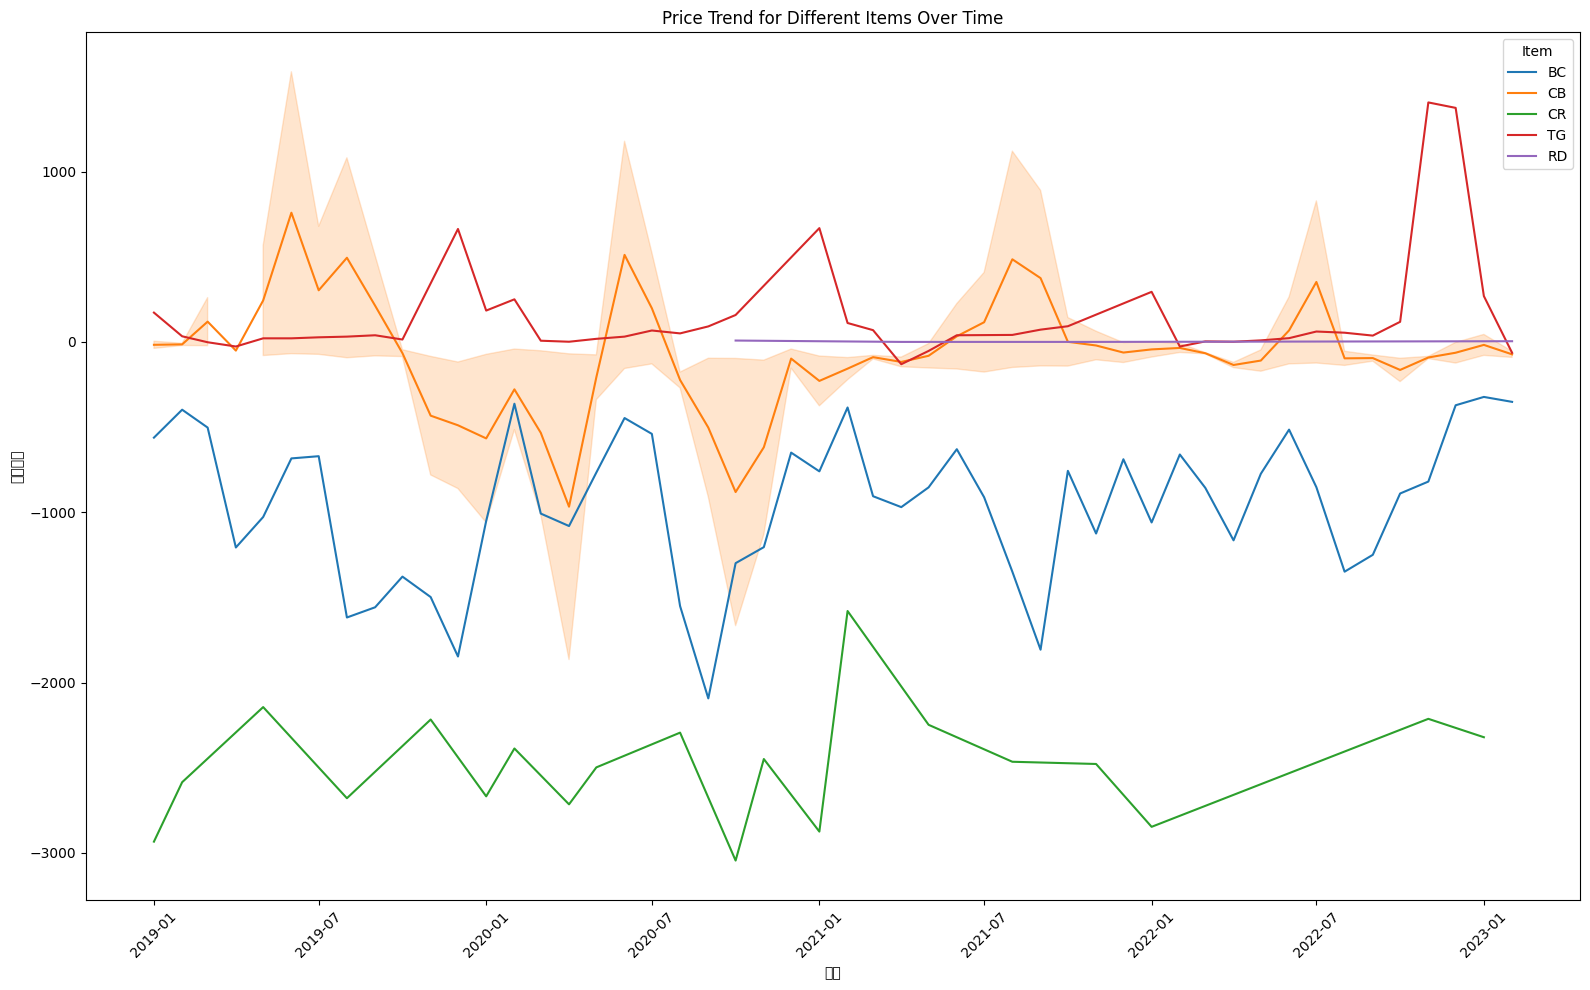

In [ ]:
# Filtering the data for visualization of 'item' and 'price(원/kg)' trend
trade_balance_data = df_test[['기간', '품목명', '무역수지']].copy()

# Plotting price trends for different items
plt.figure(figsize=(16, 10))
sns.lineplot(x='기간', y='무역수지', hue='품목명', data=trade_balance_data)

plt.title('Price Trend for Different Items Over Time')
plt.xlabel('기간')
plt.ylabel('무역수지')
plt.xticks(rotation=45)
plt.legend(title='Item')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# 정상성 파악


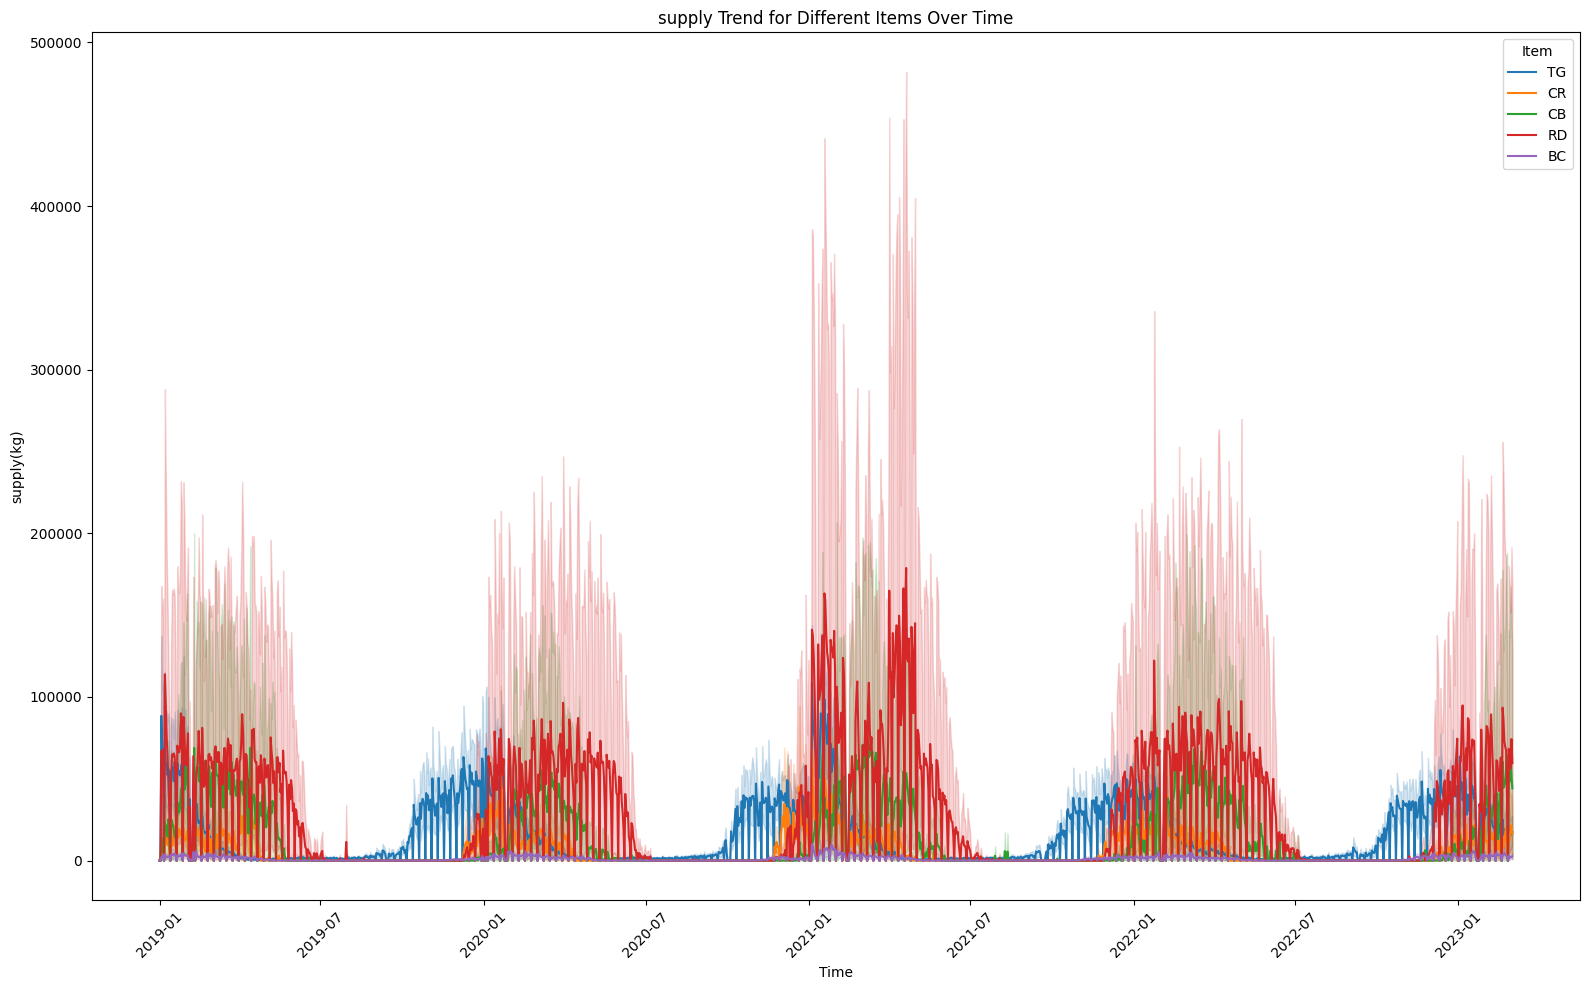

In [ ]:
# Filtering the data for visualization of 'item' and 'price(원/kg)' trend
item_supply_data = data[['timestamp', 'item', 'supply(kg)']].copy()

# Plotting price trends for different items
plt.figure(figsize=(16, 10))
sns.lineplot(x='timestamp', y='supply(kg)', hue='item', data=item_supply_data)

plt.title('supply Trend for Different Items Over Time')
plt.xlabel('Time')
plt.ylabel('supply(kg)')
plt.xticks(rotation=45)
plt.legend(title='Item')

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-27-d5d1868ea792>:14: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout()
<ipython-input-27-d5d1868ea792>:14: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  plt.tight_layout()
<ipython-input-27-d5d1868ea792>:14: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
<ipython-input-27-d5d1868ea792>:14: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  plt.tight_layout()
<ipython-input-27-d5d1868ea792>:14: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  plt.tight_layout()
<ipython-input-27-d5d1868ea792>:14: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  plt.tight_layout()
<ipython-input-27-d5d1868ea792>:14: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  plt.tight_layout()
<ipython-input-27-d5d1868ea792>:14: UserWarning: Glyph 4

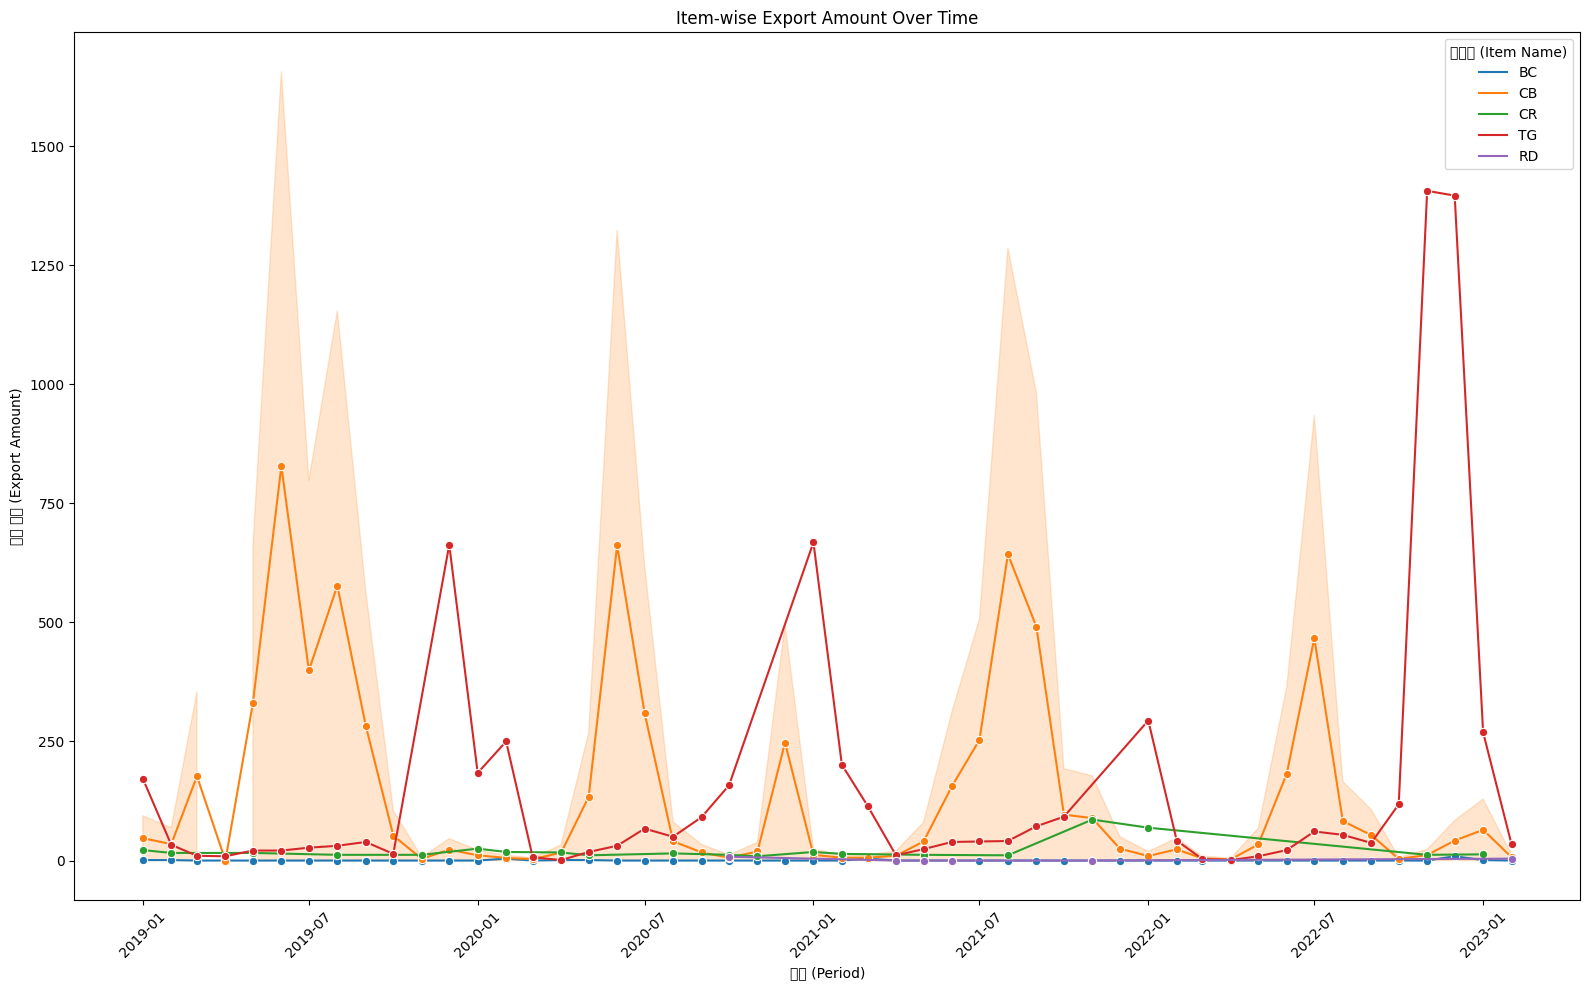

<ipython-input-27-d5d1868ea792>:31: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout()
<ipython-input-27-d5d1868ea792>:31: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  plt.tight_layout()
<ipython-input-27-d5d1868ea792>:31: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
<ipython-input-27-d5d1868ea792>:31: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  plt.tight_layout()
<ipython-input-27-d5d1868ea792>:31: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  plt.tight_layout()
<ipython-input-27-d5d1868ea792>:31: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  plt.tight_layout()
<ipython-input-27-d5d1868ea792>:31: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  plt.tight_layout()
<ipython-input-27-d5d1868ea792>:31: UserWarning: Glyph 47

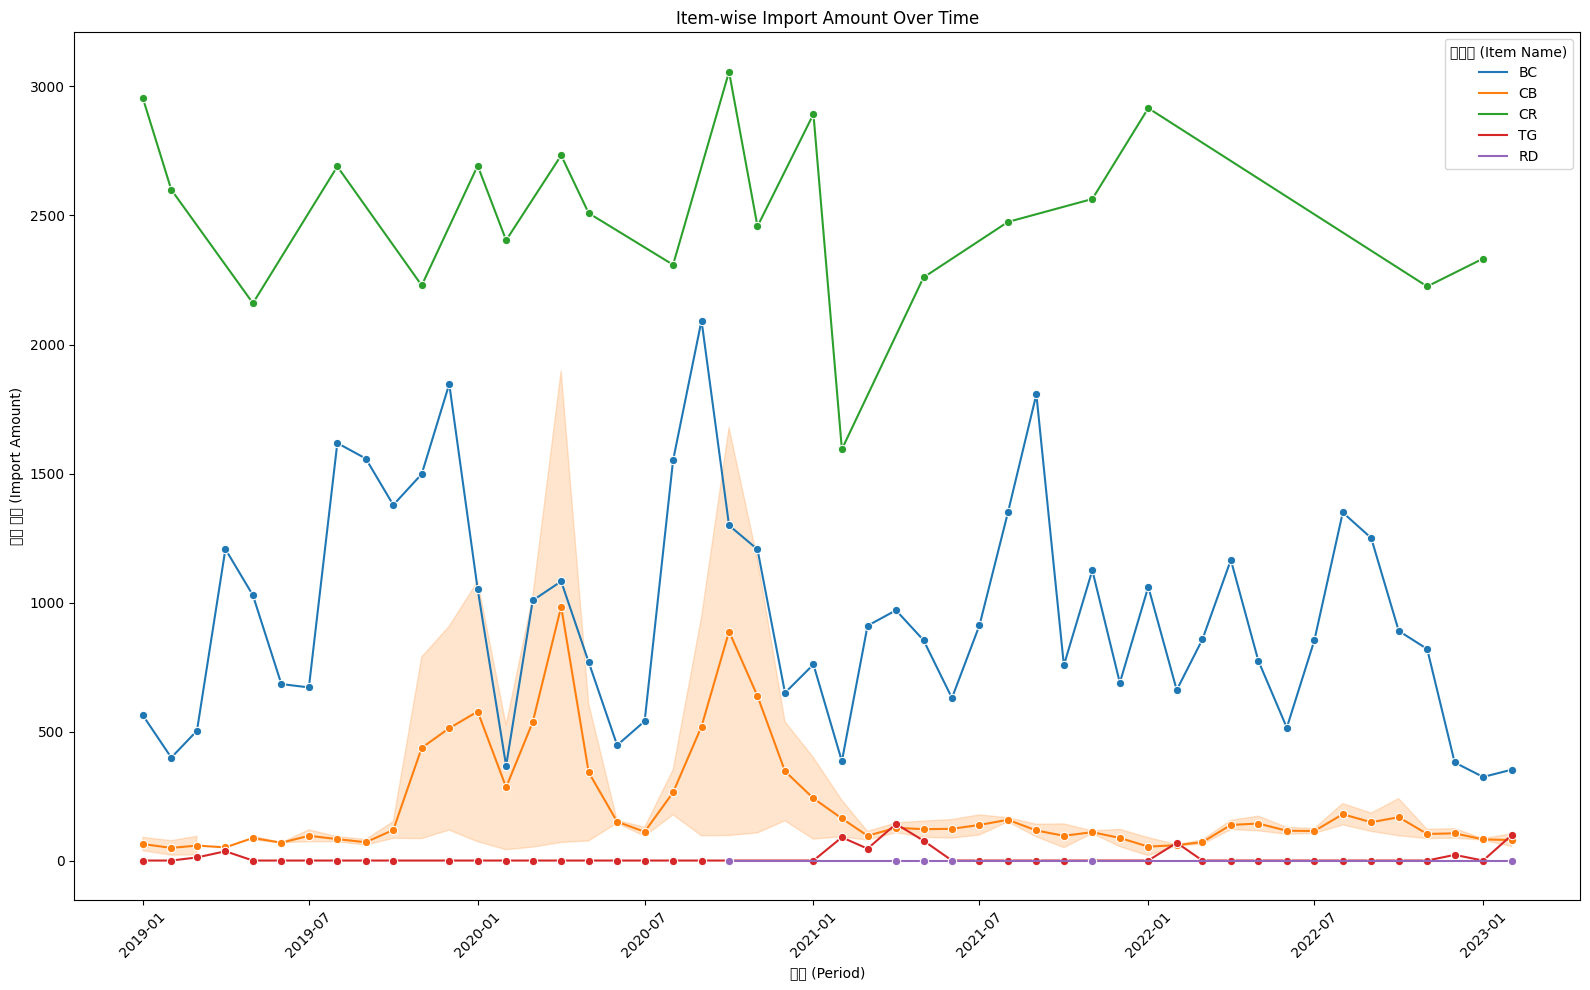

In [ ]:
plt.figure(figsize=(16, 10))

# Plot export amount over time by item
sns.lineplot(x='기간', y='수출 금액', hue='품목명', data=df_test, marker="o")

# Enhancing the plot with title and labels
plt.title('Item-wise Export Amount Over Time')
plt.xlabel('기간 (Period)')
plt.ylabel('수출 금액 (Export Amount)')
plt.xticks(rotation=45)
plt.legend(title='품목명 (Item Name)')

# Show the plot
plt.tight_layout()
plt.show()

# Now plot import amount over time by item
plt.figure(figsize=(16, 10))

# Plot import amount over time by item
sns.lineplot(x='기간', y='수입 금액', hue='품목명', data=df_test, marker="o")

# Enhancing the plot with title and labels
plt.title('Item-wise Import Amount Over Time')
plt.xlabel('기간 (Period)')
plt.ylabel('수입 금액 (Import Amount)')
plt.xticks(rotation=45)
plt.legend(title='품목명 (Item Name)')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Function to perform the ADF test
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# Perform ADF and KPSS tests on Export Amount ('수출 금액')
print("ADF Test for Export price")
adf_test(df_test['수출 금액'])

# 정상적으다.

ADF Test for Export Amount
ADF Statistic: -4.409731
p-value: 0.000285
Critical Values:
	1%: -3.461
	5%: -2.875
	10%: -2.574


In [ ]:
print("ADF Test for Import price")
adf_test(df_test['수입 금액'])
# 정상적으로 보기 조금 어렵다.

ADF Test for Import price
ADF Statistic: -17.951883
p-value: 0.000000
Critical Values:
	1%: -3.461
	5%: -2.875
	10%: -2.574


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Since 'ID' and 'timestamp' columns are not necessary for model training, we can drop them
# 'supply(kg)' is also not listed as a feature to use, so we'll exclude it as well
features = data.drop(['ID', 'timestamp', 'supply(kg)', 'price(원/kg)'], axis=1)
target = data['price(원/kg)']

# Encoding categorical features
label_encoders = {}
for column in features.columns:
    label_encoders[column] = LabelEncoder()
    features[column] = label_encoders[column].fit_transform(features[column])



In [ ]:
features.nunique()

item           5
corporation    6
location       2
dtype: int64

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize a Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define a grid of hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=2)

# Fit the GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Best parameters from the grid search
best_params = grid_search.best_params_
best_params


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=10, min_sa

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON/제주 특산물 가격예측/open (3)/open/test.csv')
test_data.head()

,ID,timestamp,item,corporation,location
0,TG_A_J_20230304,2023-03-04,TG,A,J
1,TG_A_J_20230305,2023-03-05,TG,A,J
2,TG_A_J_20230306,2023-03-06,TG,A,J
3,TG_A_J_20230307,2023-03-07,TG,A,J
4,TG_A_J_20230308,2023-03-08,TG,A,J


In [ ]:
test_features = test_data.drop(['ID', 'timestamp' ], axis=1)


# Encoding categorical features
label_encoders = {}
for column in test_features.columns:
    label_encoders[column] = LabelEncoder()
    test_features[column] = label_encoders[column].fit_transform(test_features[column])

In [ ]:
best_model.predict(test_features)

array([2553.82798794, 2553.82798794, 2553.82798794, ...,  249.07999257,
        249.07999257,  249.07999257])

In [ ]:
submission=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON/제주 특산물 가격예측/open (3)/open/sample_submission.csv')

In [ ]:
submission['answer']=best_model.predict(test_features)

In [ ]:
submission

,ID,answer
0,TG_A_J_20230304,2553.827988
1,TG_A_J_20230305,2553.827988
2,TG_A_J_20230306,2553.827988
3,TG_A_J_20230307,2553.827988
4,TG_A_J_20230308,2553.827988
...,...,...
1087,RD_F_J_20230327,249.079993
1088,RD_F_J_20230328,249.079993
1089,RD_F_J_20230329,249.079993
1090,RD_F_J_20230330,249.079993


In [ ]:
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/DACON/제주 특산물 가격예측/open (3)/open/sample_submission.csv', index=False)